In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# NetworkX Data Capabilities

NetworkX has many built in functions to read data from a variety of formats. Because formats can be pretty esoteric this is also the source of many bugs. Please if you find them report them. Here is a brief list of the file formats NetworkX can read and write, and their corresponding function names

| Format | Read Function | Write Function |
| - | -| -|
| Adjacency List| `nx.read_adjlist` | `nx.write_adjlist`|
| Edge List |`nx.read_edgelist` | `nx.write_edgelist`|
| Graph Exchange XML Format (GEXF)| `nx.read_gexf` |`nx.write_gexf`|
| Graph Modeling Language (GML)| `nx.read_gml` |`nx.write_gml`|
| Pickle, Python's serialization format for NetworkX graphs| `nx.read_gpickle` | `nx.write_gpickle`|
| GraphML | `nx.read_graphml` |`nx.write_graphml`|
| Leda | `nx.read_leda` | `nx.write_leda`|
| Multiline Adjacency List| `nx.read_multiline_adjlist` | `nx.write_multiline_adjlist`|
| Esri Shapefile| `nx.read_shp` |`nx.write_shp`|
| Yet Another Markup Language (YAML)| `nx.read_yaml` | `nx.write_yaml`|
| p2g (metabolic pathways)|`nx.read_p2g` | `nx.write_p2g`|
| pajek|`nx.read_pajek` | `nx.write_pajek`|
| sparse6|`nx.read_sparse6` | `nx.write_sparse6`|

# Creating Graphs from Other Python Data Structures

## Matrices and Arrays

It is often useful to create graphs from other types of python data structures. In particular, graphs are often represented by matrices. If your data has a matrix represenatation, NetworkX can easily create a graph using `from_numpy_matrix`

In [2]:
import numpy as np

In [6]:
A = np.random.binomial(1, 0.25, size=(7, 7)) # Random 1/s with probability 1/25
A  # see this matrix as the adjacency matrix representation of a graph

array([[1, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]])

In [7]:
G = nx.from_numpy_matrix(A)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6))

In [8]:
G.edges()

EdgeView([(0, 0), (0, 1), (0, 3), (0, 4), (1, 2), (1, 4), (1, 5), (3, 4), (5, 6)])

In [9]:
G.order()

7

In [10]:
G.size()

9

In [11]:
G.degree()  # a self-loop counts as 2 degrees

DegreeView({0: 5, 1: 4, 2: 1, 3: 2, 4: 3, 5: 2, 6: 1})

NetworkX can handle other data structures such as a list of edges (`from_edgelist`) and `scipy` sparse matrices (`scipy_sparse_matrix`). You can use the `create_using` keyword to make a `DiGraph`s or `MultiGraph`s.

In [12]:
# make a list of edges for a graph with 6 nodes
edges = []
n = 6
for u in range(n):
    for v in range(n):
        if u % 3 == 0 and u > v:
            edges.append((u, v))
        elif u % 3 == 1 and u > v:
            edges.append((u, v))
            
edges

[(1, 0), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (4, 3)]

In [13]:
D = nx.from_edgelist(edges, create_using=nx.DiGraph())

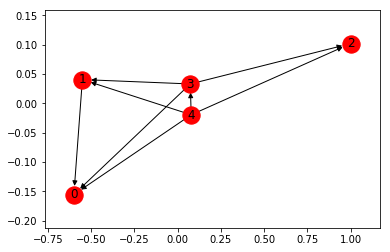

In [14]:
nx.draw_networkx(D)

You can also create matrices out of already created graphs

In [18]:
G = nx.Graph()
for u in range(5):
    G.add_edge(u, u, index=u**2)  # self-loops

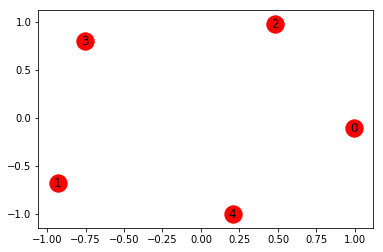

In [19]:
nx.draw_networkx(G)

In [20]:
matrix = nx.to_numpy_matrix(G)
matrix

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

You can output weighted matrices too

In [21]:
nx.to_numpy_matrix(G, weight='index')

matrix([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  9.,  0.],
        [ 0.,  0.,  0.,  0., 16.]])

## Other Graphs

Another obvious way to create graphs is to use other graphs. This can be especially useful when coverting between `Graph`s and `DiGraphs` or making copies of graphs for modification.

In [22]:
D = nx.DiGraph()

D.add_star(range(5))
D.add_cycle(range(5,10))

D.add_edge(4,5)
D.add_edge(5,4)

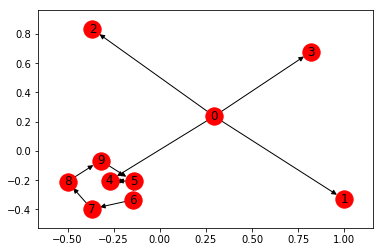

In [32]:
nx.draw_networkx(D)

In [33]:
D.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (4, 5), (5, 4), (5, 6), (6, 7), (7, 8), (8, 9), (9, 5)])

In [34]:
G = nx.Graph(D)

In [36]:
G.edges()  # (4,5) and (5,4) are now contracted into 1 edge (4,5)

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (4, 5), (5, 9), (5, 6), (6, 7), (7, 8), (8, 9)])

In [37]:
G = nx.Graph()
G.add_star(range(5))
D = nx.DiGraph(G)

In [38]:
D.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (2, 0), (3, 0), (4, 0)])

Notice when we create a directed graph from a graph we get edges in both directions.

## Graph Operations

Finally, NetworkX includes a number of graph operations to make combining graphs easier.

1. Create a complete graph called `C` of five nodes
2. Create a line graph (a path) called `L` of 10 nodes
3. Create a star graph called `S` with of 7 nodes with 0 at it's center

In [39]:
C = nx.Graph()
C.add_nodes_from(range(5))
C.add_edges_from([(u,v) for v in C.nodes() for u in C.nodes() if u != v])

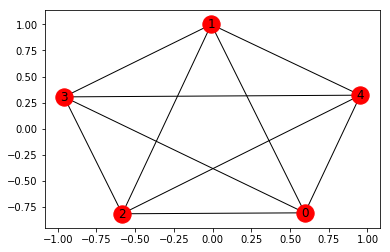

In [40]:
nx.draw_networkx(C)

In [41]:
C.nodes()

NodeView((0, 1, 2, 3, 4))

In [42]:
C.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [43]:
L = nx.Graph()
L.add_nodes_from(range(10))
L.add_edges_from((i, i + 1) for i in range(9))

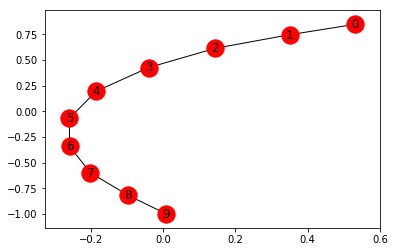

In [44]:
nx.draw_networkx(L)

In [45]:
L.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [46]:
L.edges()

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [47]:
S = nx.Graph()
S.add_star(range(7))

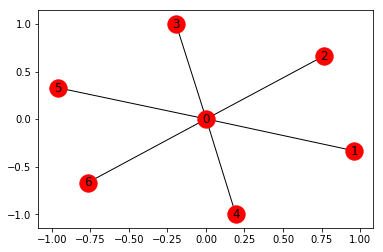

In [48]:
nx.draw_networkx(S)

In [49]:
S.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6))

In [50]:
S.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)])

Try out these functions, what do they produce?
 - `nx.compose(C,L)`
 - `nx.cartesian_product(S,L)`
 - `nx.complement(S)`

In [51]:
X = nx.compose(C,L)  # combine/join/merge 2 graphs
X.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [52]:
X.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

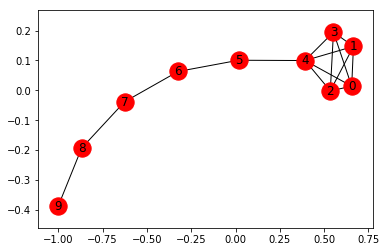

In [59]:
nx.draw_networkx(X)

In [60]:
Y = nx.cartesian_product(S,L)  # ......
Y.nodes()

NodeView(((5, 9), (4, 7), (1, 3), (4, 8), (3, 0), (2, 8), (5, 4), (0, 7), (5, 6), (0, 0), (1, 6), (5, 1), (3, 7), (0, 3), (2, 5), (5, 8), (4, 0), (1, 2), (4, 9), (3, 3), (2, 9), (2, 0), (4, 4), (6, 3), (1, 5), (3, 6), (0, 4), (5, 7), (5, 3), (4, 1), (1, 1), (0, 1), (3, 2), (2, 6), (6, 6), (5, 0), (4, 5), (2, 2), (5, 5), (1, 4), (6, 0), (3, 9), (0, 5), (2, 1), (6, 8), (6, 4), (4, 2), (1, 0), (0, 8), (6, 5), (3, 5), (2, 7), (6, 9), (4, 6), (6, 7), (5, 2), (6, 1), (3, 1), (0, 2), (3, 8), (0, 6), (1, 8), (6, 2), (4, 3), (1, 7), (0, 9), (2, 3), (3, 4), (2, 4), (1, 9)))

In [61]:
Y.edges()

EdgeView([((5, 9), (0, 9)), ((5, 9), (5, 8)), ((4, 7), (4, 6)), ((4, 7), (0, 7)), ((4, 7), (4, 8)), ((1, 3), (1, 2)), ((1, 3), (0, 3)), ((1, 3), (1, 4)), ((4, 8), (0, 8)), ((4, 8), (4, 9)), ((3, 0), (0, 0)), ((3, 0), (3, 1)), ((2, 8), (2, 7)), ((2, 8), (0, 8)), ((2, 8), (2, 9)), ((5, 4), (5, 3)), ((5, 4), (5, 5)), ((5, 4), (0, 4)), ((0, 7), (2, 7)), ((0, 7), (0, 6)), ((0, 7), (0, 8)), ((0, 7), (6, 7)), ((0, 7), (1, 7)), ((0, 7), (3, 7)), ((0, 7), (5, 7)), ((5, 6), (0, 6)), ((5, 6), (5, 7)), ((5, 6), (5, 5)), ((0, 0), (0, 1)), ((0, 0), (2, 0)), ((0, 0), (5, 0)), ((0, 0), (1, 0)), ((0, 0), (6, 0)), ((0, 0), (4, 0)), ((1, 6), (0, 6)), ((1, 6), (1, 7)), ((1, 6), (1, 5)), ((5, 1), (0, 1)), ((5, 1), (5, 2)), ((5, 1), (5, 0)), ((3, 7), (3, 8)), ((3, 7), (3, 6)), ((0, 3), (6, 3)), ((0, 3), (2, 3)), ((0, 3), (3, 3)), ((0, 3), (4, 3)), ((0, 3), (0, 4)), ((0, 3), (0, 2)), ((0, 3), (5, 3)), ((2, 5), (2, 6)), ((2, 5), (0, 5)), ((2, 5), (2, 4)), ((5, 8), (0, 8)), ((5, 8), (5, 7)), ((4, 0), (4, 1)), 

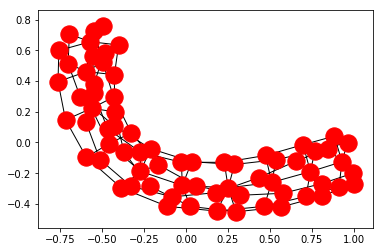

In [64]:
nx.draw_networkx(Y, with_labels=False)  # cartesian_product will be a huge mess

In [66]:
Z = nx.complement(S)  # the complement graph

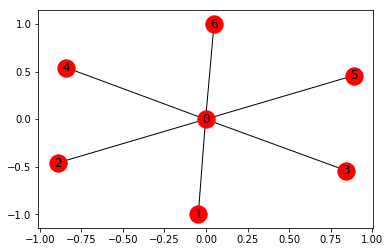

In [67]:
nx.draw_networkx(S)

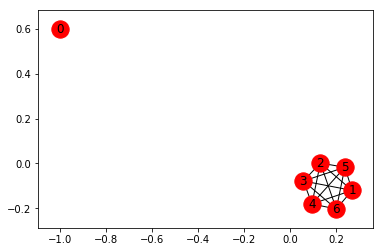

In [75]:
nx.draw_networkx(Z)  # the complement of a star = a complete graph + isolated center